<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [5]:
lambda_heights = [72, 72, 77, 72, 73, 67, 64, 58, 63, 78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head(10)

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [7]:
df.heights.mean()

69.6

In [0]:
import random
random.seed(10)
population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  


In [0]:
sample = random.sample(population, 100)

In [29]:
import numpy as np

print(np.mean(population))
print(np.mean(sample))


0.507
0.46


In [30]:
df = pd.DataFrame({'likes_coke': sample})
df.likes_coke.mean()

0.46

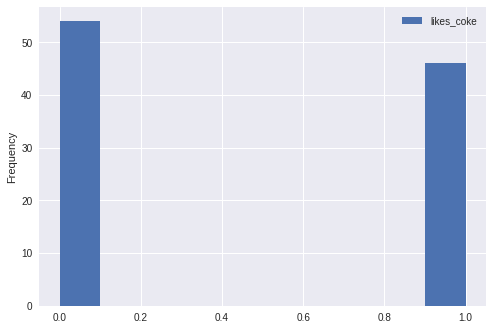

In [31]:
df.plot.hist()

In [35]:
from scipy import stats
stats.ttest_1samp(df['likes_coke'], np.mean(population))

Ttest_1sampResult(statistic=-0.9382955561680112, pvalue=0.3503760732929039)

In [37]:
df['likes_coke'].var()

0.250909090909091

In [38]:
df['likes_coke'].std()

0.5009082659620332

In [40]:
scipy.stats.ttest_1samp(df['likes_coke'], .5)

Ttest_1sampResult(statistic=-0.7985494095046901, pvalue=0.4264632540527489)

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

From the dataset description, our attributes:

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)

In [0]:
col_names = ['is_republican',
             'handicapped-infants',
             'water-project',
             'budget',
             'physician-fee-freeze',
             'el-salvador-aid',
             'religious-groups-in-schools',
             'anti-satellite-test-ban',
             'aid-to-nicaraguan-contras',
             'mx-missile',
             'immigration',
             'synfuels-corporation-cutback',
             'education-spending',
             'superfund-right-to-sue',
             'crime',
             'duty-free-exports',
             'south-africa']

In [0]:
# TODO - your code here!
congress_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
congress_votes = pd.read_csv(congress_url, names = col_names)

In [0]:
congress_votes = congress_votes.replace('?', np.NaN)
congress_votes['is_republican'] = congress_votes['is_republican'].replace({'republican': 1, 'democrat': 0})

In [53]:
congress_votes.isnull().sum()

is_republican                     0
handicapped-infants              12
water-project                    48
budget                           11
physician-fee-freeze             11
el-salvador-aid                  15
religious-groups-in-schools      11
anti-satellite-test-ban          14
aid-to-nicaraguan-contras        15
mx-missile                       22
immigration                       7
synfuels-corporation-cutback     21
education-spending               31
superfund-right-to-sue           25
crime                            17
duty-free-exports                28
south-africa                    104
dtype: int64

In [0]:
#We'll drop this column because we're missing way too many votes.

congress_votes = congress_votes.drop(columns = ['south-africa'])

In [60]:
congress_votes.dropna().shape

(281, 16)

In [90]:
#That's a reasonable number of observations; to double check that everything is
#OK, we'll make sure we still have a solid number of Rs and Ds.

congress_votes.dropna()['is_republican'].value_counts()

0    165
1    116
Name: is_republican, dtype: int64

In [0]:
congress_votes = congress_votes.dropna()
congress_votes = congress_votes.replace({'y': 1, 'n': 0})

In [0]:
#We'll compute the percentages of Democrat/Republican support for each bill and
#store it in a new DataFrame:

new_cols =  ['handicapped-infants',
             'water-project',
             'budget',
             'physician-fee-freeze',
             'el-salvador-aid',
             'religious-groups-in-schools',
             'anti-satellite-test-ban',
             'aid-to-nicaraguan-contras',
             'mx-missile',
             'immigration',
             'synfuels-corporation-cutback',
             'education-spending',
             'superfund-right-to-sue',
             'crime',
             'duty-free-exports']
index = ['pct_dems', 'pct_repubs']
percent_support = pd.DataFrame(index = index, columns = new_cols)
percent_support

In [0]:
total_dems = congress_votes['is_republican'].value_counts()[0]
total_repubs = congress_votes['is_republican'].value_counts()[1]

for column in new_cols:
  num_support = congress_votes[congress_votes['is_republican'] == 0][column].value_counts().loc['y']
  percent_support[column].loc['pct_dems'] = num_support/total_dems

for column in new_cols:
  num_support = congress_votes[congress_votes['is_republican'] == 1][column].value_counts().loc['y']
  percent_support[column].loc['pct_repubs'] = num_support/total_repubs


In [77]:
percent_support

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
pct_dems,0.58427,0.449438,0.865169,0.0524345,0.205993,0.460674,0.749064,0.816479,0.70412,0.464419,0.483146,0.134831,0.273408,0.337079,0.599251
pct_repubs,0.184524,0.446429,0.130952,0.970238,0.934524,0.886905,0.232143,0.142857,0.113095,0.547619,0.125,0.803571,0.809524,0.940476,0.0833333


In [0]:
#We'll add a row comparing the difference.

percent_support.loc['diff'] = (percent_support.loc['pct_dems'] - percent_support.loc['pct_repubs'])


In [100]:
repub_condition = (congress_votes['is_republican'] == 1)
dem_condition = (congress_votes['is_republican'] == 0)

sig_diff = []

for column in new_cols:
  pval = stats.ttest_ind(congress_votes[repub_condition][column],
                        congress_votes[dem_condition][column]).pvalue
  if pval <= 0.01:
    print('Signficance for', column, 'is', pval)
    sig_diff.append(column)

Signficance for handicapped-infants is 5.644221786673739e-12
Signficance for budget is 2.863437444938452e-45
Signficance for physician-fee-freeze is 2.7383164062751773e-112
Signficance for el-salvador-aid is 1.2747165657645727e-46
Signficance for religious-groups-in-schools is 2.8092485067651604e-14
Signficance for anti-satellite-test-ban is 9.749387220847724e-20
Signficance for aid-to-nicaraguan-contras is 5.723880384154964e-38
Signficance for mx-missile is 1.457289646682083e-32
Signficance for synfuels-corporation-cutback is 1.985008934991203e-10
Signficance for education-spending is 5.024855474636303e-42
Signficance for superfund-right-to-sue is 3.857553707768602e-22
Signficance for crime is 7.720583588606854e-33
Signficance for duty-free-exports is 1.2589639334382812e-19


In [101]:
#Here are all those stats:

percent_support[sig_diff]

,handicapped-infants,budget,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
pct_dems,0.58427,0.865169,0.0524345,0.205993,0.460674,0.749064,0.816479,0.70412,0.483146,0.134831,0.273408,0.337079,0.599251
pct_repubs,0.184524,0.130952,0.970238,0.934524,0.886905,0.232143,0.142857,0.113095,0.125,0.803571,0.809524,0.940476,0.0833333
diff,0.399746,0.734216,-0.917804,-0.728531,-0.426231,0.516921,0.673622,0.591025,0.358146,-0.66874,-0.536116,-0.603398,0.515918


In [103]:
non_sig_diff = []
for column in new_cols:
  pval = stats.ttest_ind(congress_votes[repub_condition][column],
                        congress_votes[dem_condition][column]).pvalue
  if pval > 0.01:
    print('No signficance for', column)
    non_sig_diff.append(column)

No signficance for water-project
No signficance for immigration


In [104]:
percent_support[non_sig_diff]

,water-project,immigration
pct_dems,0.449438,0.464419
pct_repubs,0.446429,0.547619
diff,0.00300963,-0.0831996


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars